<a href="https://colab.research.google.com/github/Engineer-Gustavo-Softworks/TRATAMENTO-DE-DADOS-NASA-TAREFA-15/blob/main/TAREFA_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Brasília_10_a_50_m_2009_e_2010.csv to Brasília_10_a_50_m_2009_e_2010.csv


<ipython-input-24-90db2b7b3826>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copia['WS10M'].fillna(df_copia['WS10M'].mean(), inplace=True)
<ipython-input-24-90db2b7b3826>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

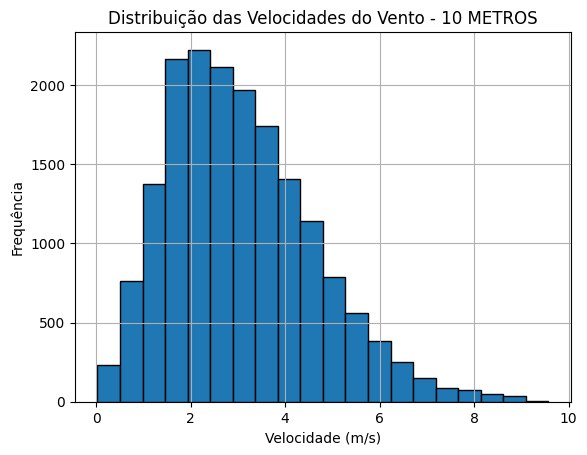

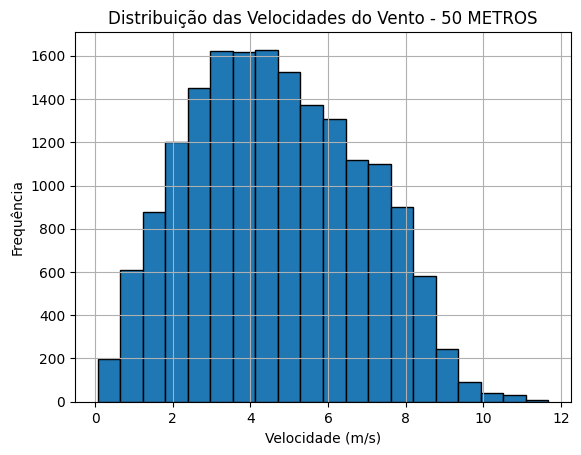

,ANO MES,WS10M,WS50M
0,2009-01,2.503320,3.750390
1,2009-02,2.423899,3.727560
2,2009-03,2.411734,3.734059
3,2009-04,2.657681,4.175917
4,2009-05,3.013965,4.809610


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Carregamento da planilha CSV, pulando as 10 primeiras linhas ---
df = pd.read_csv('Brasília_10_a_50_m_2009_e_2010.csv', skiprows=10)

# --- Cópia de segurança ---
df_copia = df.copy(deep=True)

# --- Substituir valores -9999 por NaN ---
df_copia[['YEAR', 'MO', 'DY', 'HR', 'WS10M', 'WS50M']] = df_copia[[
    'YEAR', 'MO', 'DY', 'HR', 'WS10M', 'WS50M']].replace(-9999, np.nan)

# --- Substituir valores nulos pela média ---
df_copia['WS10M'].fillna(df_copia['WS10M'].mean(), inplace=True)
df_copia['WS50M'].fillna(df_copia['WS50M'].mean(), inplace=True)

# --- Dados de velocidade ---
coluna_WS10M = 'WS10M'
coluna_WS50M = 'WS50M'

dados_WS10M = df_copia[coluna_WS10M].dropna().values
dados_WS50M = df_copia[coluna_WS50M].dropna().values

dados_WS10M = dados_WS10M[dados_WS10M > 0]  # remove zeros e negativos
dados_WS50M = dados_WS50M[dados_WS50M > 0]  # remove zeros e negativos

# --- Criar coluna DATETIME ---
df_copia['DATETIME'] = pd.to_datetime(df_copia[['YEAR', 'MO', 'DY', 'HR']].astype(int).rename(
    columns={'YEAR': 'year', 'MO': 'month', 'DY': 'day', 'HR': 'hour'}
))

#========Criando uma coluna de Ano Mes para agrupar e fazer a média=========

df_copia['ANO MES'] = df_copia['DATETIME'].dt.to_period('M')
df_copia = df_copia.groupby('ANO MES')[['WS10M', 'WS50M']].mean().reset_index()

#--- Visualização opcional: histograma das velocidades ---
plt.hist(dados_WS10M, bins=20, edgecolor='black')
plt.title('Distribuição das Velocidades do Vento - 10 METROS')
plt.xlabel('Velocidade (m/s)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

plt.hist(dados_WS50M, bins=20, edgecolor='black')
plt.title('Distribuição das Velocidades do Vento - 50 METROS')
plt.xlabel('Velocidade (m/s)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

df_copia.describe()
df_copia.head()

In [ ]:
# # --- Parâmetros da equação do perfil de potência ---
# h0 = 10.0  # metros
# h = 50.0   # metros
# alpha = 0.20

# # --- Aplicar a equação para estimar WS50M ---
# df_copia['WS50M_ESTIMADA'] = df_copia['WS10M'] * (h / h0) ** alpha

# # --- Converter a coluna 'ANO MES' para datetime antes de plotar ---
# df_copia['ANO MES Datetime'] = df_copia['ANO MES'].dt.to_timestamp()

# # --- Exemplo de visualização (opcional) ---
# plt.figure(figsize=(10,6))
# # Usar a nova coluna 'ANO MES Datetime' para plotar no eixo x
# plt.plot(df_copia['ANO MES Datetime'], df_copia['WS50M_ESTIMADA'], label='WS50M Estimada (perfil de potência)', color='blue', linewidth=0.7)
# plt.plot(df_copia['ANO MES Datetime'], df_copia['WS50M'], label='WS50M Medida', color='red', linewidth=0.7, alpha=0.7)
# plt.xlabel('Data')
# plt.ylabel('Velocidade do Vento (m/s)')
# plt.title('Comparação: WS50M Estimada vs. WS50M Medida')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # --- Salvar o dataframe com a nova coluna (opcional) ---
# # df_copia.to_csv('Brasilia_com_WS50M_estimado.csv', index=False)

=== Tabela - Valores de velocidade estimada pelo perfil exponencial ===
    ANO MES  WS10M  WS50M  WS50M_ESTIMADA_POTENCIA
0   2009-01   2.50   3.75                     3.45
1   2009-02   2.42   3.73                     3.34
2   2009-03   2.41   3.73                     3.33
3   2009-04   2.66   4.18                     3.67
4   2009-05   3.01   4.81                     4.16
5   2009-06   3.03   4.83                     4.18
6   2009-07   3.57   5.63                     4.93
7   2009-08   4.24   6.33                     5.84
8   2009-09   3.11   4.64                     4.29
9   2009-10   2.36   3.39                     3.26
10  2009-11   2.37   3.45                     3.27
11  2009-12   2.95   4.38                     4.08
12  2010-01   2.51   3.72                     3.46
13  2010-02   2.72   3.99                     3.75
14  2010-03   2.63   4.06                     3.63
15  2010-04   3.09   4.91                     4.26
16  2010-05   3.13   5.00                     4.32
17  2010-0

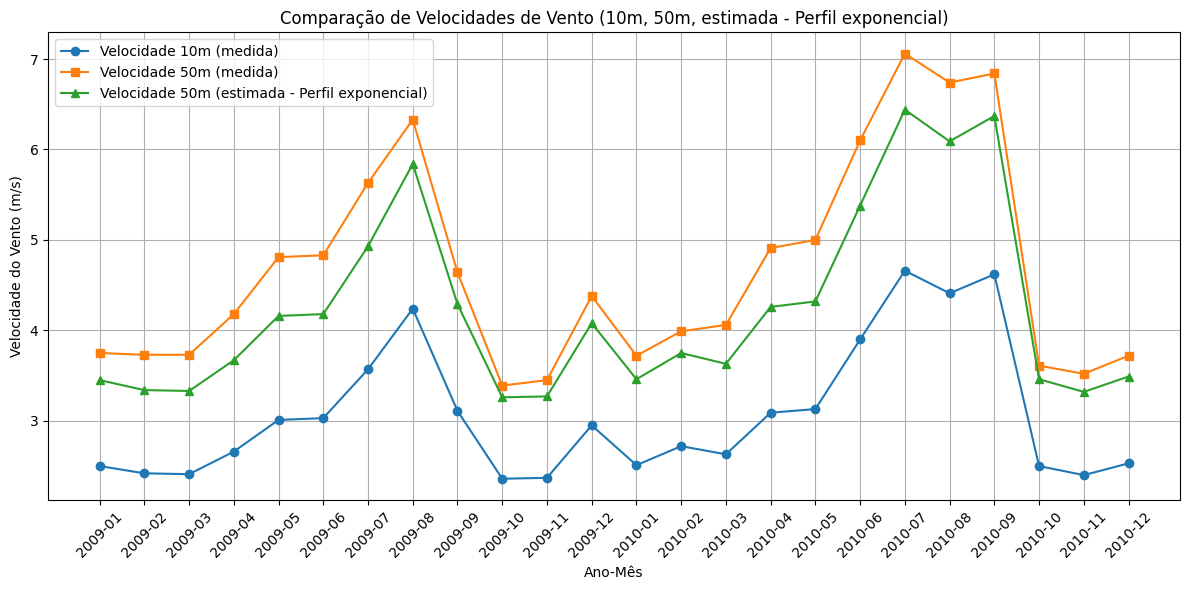

In [ ]:
# --- Parâmetros da equação do perfil de potência ---
h0 = 10.0  # metros
h = 50.0   # metros
alpha = 0.20

# --- Criar nova coluna com velocidade estimada a 50m (perfil de potência) ---
df_copia['WS50M_ESTIMADA_POTENCIA'] = df_copia['WS10M'] * (h / h0) ** alpha

# --- Agrupando e criando DataFrame de médias ---
df_media_mensal = df_copia.groupby('ANO MES')[['WS10M', 'WS50M', 'WS50M_ESTIMADA_POTENCIA']].mean().reset_index().round(2)

# --- Exibir resultado ---
print("=== Tabela - Valores de velocidade estimada pelo perfil exponencial ===")
print(df_media_mensal)

# --- Plotar gráfico comparativo (no mesmo padrão do logarítmico) ---
plt.figure(figsize=(12, 6))
plt.plot(df_media_mensal['ANO MES'].astype(str), df_media_mensal['WS10M'], label='Velocidade 10m (medida)', marker='o')
plt.plot(df_media_mensal['ANO MES'].astype(str), df_media_mensal['WS50M'], label='Velocidade 50m (medida)', marker='s')
plt.plot(df_media_mensal['ANO MES'].astype(str), df_media_mensal['WS50M_ESTIMADA_POTENCIA'], label='Velocidade 50m (estimada - Perfil exponencial)', marker='^')
plt.xticks(rotation=45)
plt.xlabel('Ano-Mês')
plt.ylabel('Velocidade do Vento (m/s)')
plt.title('Comparação de Velocidades de Vento (10m, 50m, estimada - Perfil exponencial)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

=== Tabela - Valores de velocidade estimada pelo comportamento logarítmico ===
    ANO MES  WS10M  WS50M  WS50M_ESTIMADA_LOG
0   2009-01   2.50   3.75                3.38
1   2009-02   2.42   3.73                3.27
2   2009-03   2.41   3.73                3.25
3   2009-04   2.66   4.18                3.59
4   2009-05   3.01   4.81                4.07
5   2009-06   3.03   4.83                4.09
6   2009-07   3.57   5.63                4.82
7   2009-08   4.24   6.33                5.72
8   2009-09   3.11   4.64                4.19
9   2009-10   2.36   3.39                3.19
10  2009-11   2.37   3.45                3.20
11  2009-12   2.95   4.38                3.99
12  2010-01   2.51   3.72                3.38
13  2010-02   2.72   3.99                3.67
14  2010-03   2.63   4.06                3.55
15  2010-04   3.09   4.91                4.17
16  2010-05   3.13   5.00                4.23
17  2010-06   3.90   6.10                5.26
18  2010-07   4.66   7.06                6.29
1

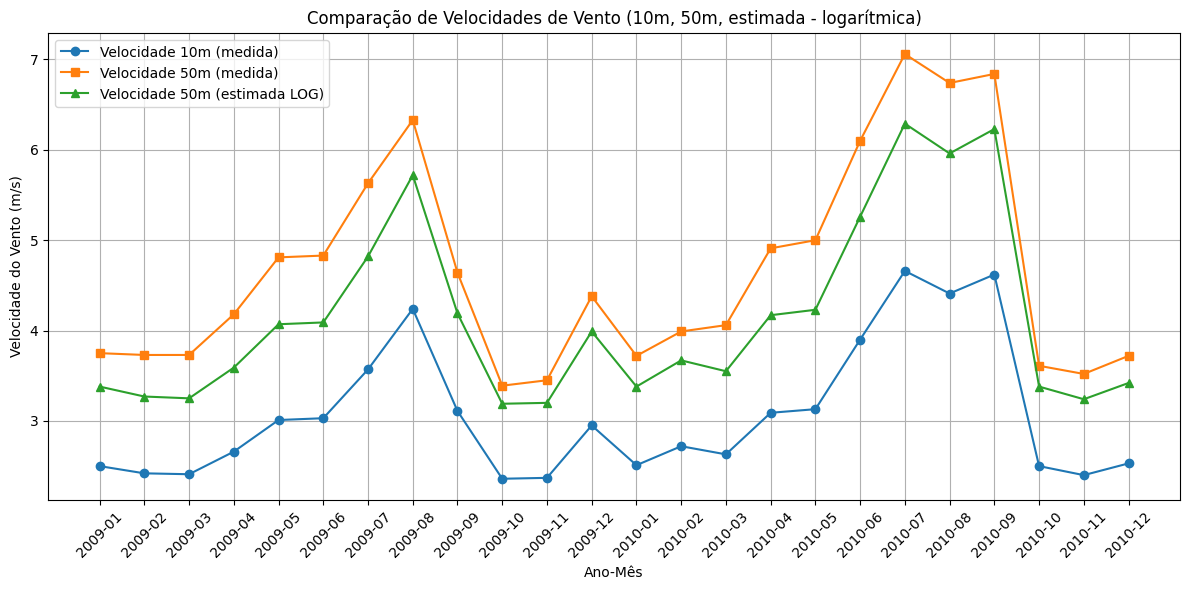

In [ ]:
# --- Parâmetros da equação logarítmica ---
h0 = 10      # altura de referência (metros)
h = 50       # altura desejada (metros)
z = 0.1      # comprimento de rugosidade (metros)

# --- Função para estimar a velocidade a 50m ---
def estimar_velocidade_log(v0, h, h0, z):
    return v0 * ( np.log(h / z) / np.log(h0 / z) )

# --- Criar nova coluna com velocidade estimada a 50m ---
df_copia['WS50M_ESTIMADA_LOG'] = estimar_velocidade_log(df_copia['WS10M'], h, h0, z)

# df_copia['ANO MES Datetime'] = df_copia['ANO MES'].dt.to_period('M')

# --- Agrupando e criando DataFrame de médias ---
df_media_mensal = df_copia.groupby('ANO MES')[['WS10M', 'WS50M', 'WS50M_ESTIMADA_LOG']].mean().reset_index().round(2)

# --- Exibir resultado ---
print("=== Tabela - Valores de velocidade estimada pelo comportamento logarítmico ===")
print(df_media_mensal)

# --- Plotar gráfico comparativo (opcional) ---
plt.figure(figsize=(12, 6))
plt.plot(df_media_mensal['ANO MES'].astype(str), df_media_mensal['WS10M'], label='Velocidade 10m (medida)', marker='o')
plt.plot(df_media_mensal['ANO MES'].astype(str), df_media_mensal['WS50M'], label='Velocidade 50m (medida)', marker='s')
plt.plot(df_media_mensal['ANO MES'].astype(str), df_media_mensal['WS50M_ESTIMADA_LOG'], label='Velocidade 50m (estimada LOG)', marker='^')
plt.xticks(rotation=45)
plt.xlabel('Ano-Mês')
plt.ylabel('Velocidade do Vento (m/s)')
plt.title('Comparação de Velocidades de Vento (10m, 50m, estimada - logarítmica)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

=== Tabela - Valores de velocidade estimada pelo Perfil exponencial e Comportamento logarítmico ===
    ANO MES  WS10M  WS50M  WS50M_ESTIMADA_POTENCIA  WS50M_ESTIMADA_LOG
0   2009-01   2.50   3.75                     3.45                3.38
1   2009-02   2.42   3.73                     3.34                3.27
2   2009-03   2.41   3.73                     3.33                3.25
3   2009-04   2.66   4.18                     3.67                3.59
4   2009-05   3.01   4.81                     4.16                4.07
5   2009-06   3.03   4.83                     4.18                4.09
6   2009-07   3.57   5.63                     4.93                4.82
7   2009-08   4.24   6.33                     5.84                5.72
8   2009-09   3.11   4.64                     4.29                4.19
9   2009-10   2.36   3.39                     3.26                3.19
10  2009-11   2.37   3.45                     3.27                3.20
11  2009-12   2.95   4.38                     4.

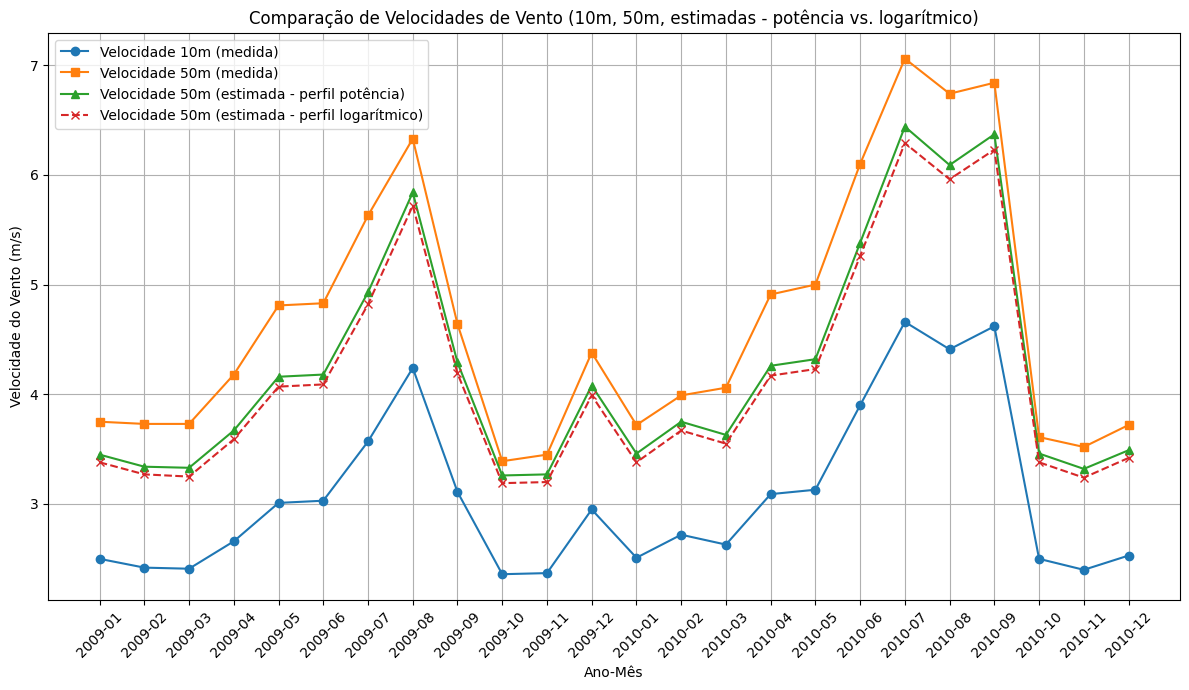


=== Erro Absoluto ===
MAE (Perfil Potência): 0.431 m/s
MAE (Perfil Logarítmico): 0.524 m/s


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Parâmetros ---
h0 = 10.0   # altura de referência (metros)
h = 50.0    # altura desejada (metros)
alpha = 0.20
z = 0.1     # comprimento de rugosidade (metros)

# --- Função do perfil logarítmico ---
def estimar_velocidade_log(v0, h, h0, z):
    return v0 * (np.log(h / z) / np.log(h0 / z))

# --- Criar colunas de velocidades estimadas ---
df_copia['WS50M_ESTIMADA_POTENCIA'] = df_copia['WS10M'] * (h / h0) ** alpha
df_copia['WS50M_ESTIMADA_LOG'] = estimar_velocidade_log(df_copia['WS10M'], h, h0, z)

# --- Agrupamento mensal para gerar as médias ---
df_media_mensal = df_copia.groupby('ANO MES')[['WS10M', 'WS50M', 'WS50M_ESTIMADA_POTENCIA', 'WS50M_ESTIMADA_LOG']].mean().reset_index().round(2)

# --- Exibir resultado no console ---
print("=== Tabela - Valores de velocidade estimada pelo Perfil exponencial e Comportamento logarítmico ===")
print(df_media_mensal)

# --- Plotar gráfico comparativo com os dois métodos ---
plt.figure(figsize=(12, 7))
plt.plot(df_media_mensal['ANO MES'].astype(str), df_media_mensal['WS10M'], label='Velocidade 10m (medida)', marker='o')
plt.plot(df_media_mensal['ANO MES'].astype(str), df_media_mensal['WS50M'], label='Velocidade 50m (medida)', marker='s')
plt.plot(df_media_mensal['ANO MES'].astype(str), df_media_mensal['WS50M_ESTIMADA_POTENCIA'], label='Velocidade 50m (estimada - perfil potência)', marker='^')
plt.plot(df_media_mensal['ANO MES'].astype(str), df_media_mensal['WS50M_ESTIMADA_LOG'], label='Velocidade 50m (estimada - perfil logarítmico)', marker='x', linestyle='--')

# --- Ajustes do gráfico ---
plt.xticks(rotation=45)
plt.xlabel('Ano-Mês')
plt.ylabel('Velocidade do Vento (m/s)')
plt.title('Comparação de Velocidades de Vento (10m, 50m, estimadas - potência vs. logarítmico)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Calcular Erro Absoluto ---
df_media_mensal['ERRO_ABS_POTENCIA'] = abs(df_media_mensal['WS50M_ESTIMADA_POTENCIA'] - df_media_mensal['WS50M'])
df_media_mensal['ERRO_ABS_LOG'] = abs(df_media_mensal['WS50M_ESTIMADA_LOG'] - df_media_mensal['WS50M'])

# --- Calcular MAE ---
mae_potencia = df_media_mensal['ERRO_ABS_POTENCIA'].mean()
mae_log = df_media_mensal['ERRO_ABS_LOG'].mean()

# --- Exibir resultados ---
print("\n=== Erro Absoluto ===")
print(f"MAE (Perfil Potência): {mae_potencia:.3f} m/s")
print(f"MAE (Perfil Logarítmico): {mae_log:.3f} m/s")